**Problem Statement**

Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.

**Dataset Description**

***IMPORTING LIBRARIES***

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [27]:
##Importing the dataset
df=pd.read_csv("C:\\Users\\Smita Akolkar\\OneDrive\\Attachments\\Desktop\\Project Data\\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


So Age and Cabin have null values

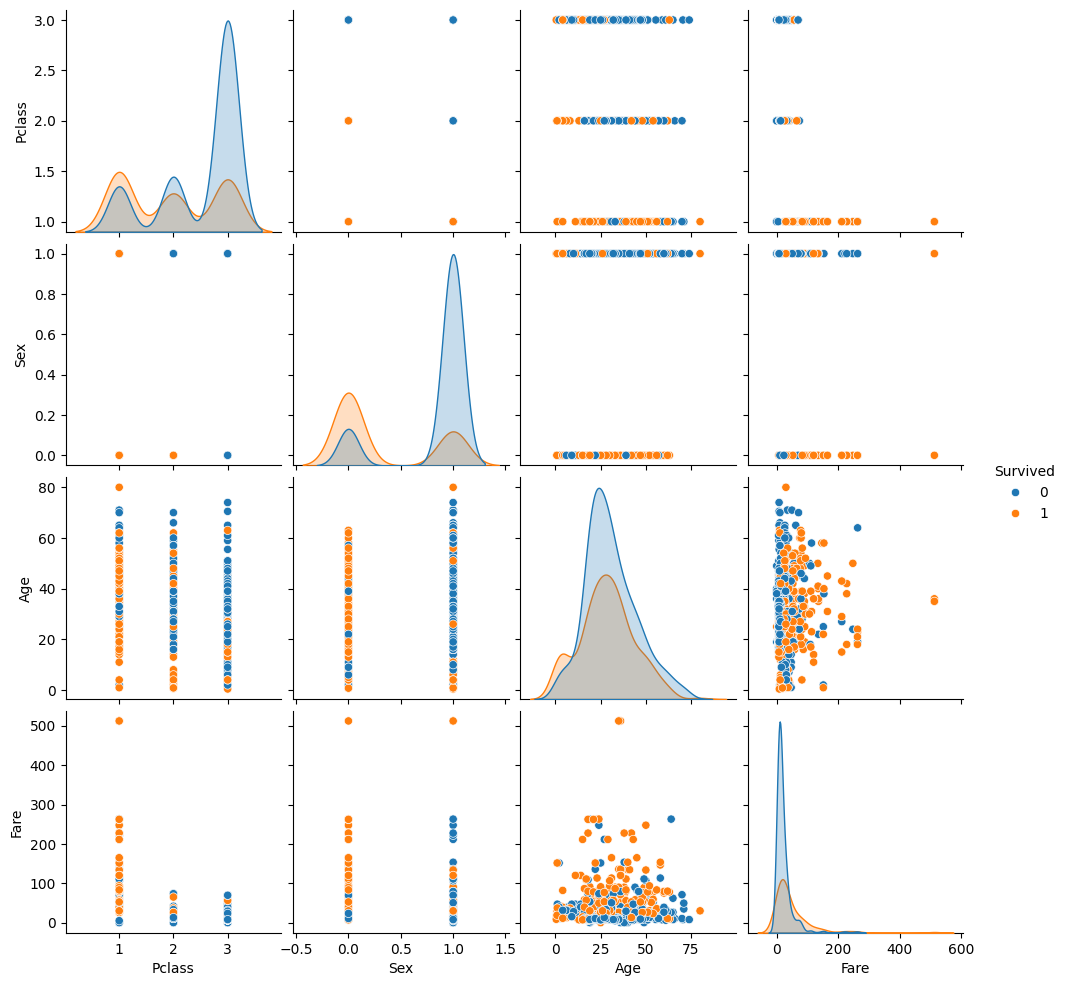

In [54]:
import seaborn as sns
cols = ['Pclass','Sex','Age','Survived','Fare']
sns.pairplot(df[cols], hue='Survived')

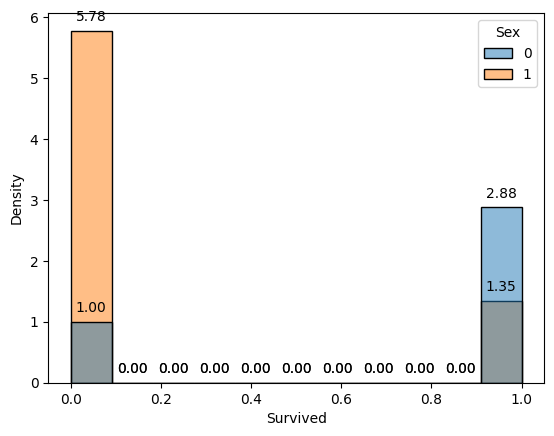

In [55]:
ax=sns.histplot(data=df,x="Survived",stat="density",hue="Sex")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0,10), textcoords='offset points')

plt.show()

In [30]:
Survived=df[df.Survived==1]
Survived.shape

(342, 12)

In [31]:
from sklearn.preprocessing import LabelEncoder
le_sex=LabelEncoder()
df["Sex"]=le_sex.fit_transform(df["Sex"])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df["Age"].fillna(round(df["Age"].mean()))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [39]:
df["Age"].mean()

29.69911764705882

In [44]:
y=df.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [48]:
x=df.drop(["PassengerId","Name","Age","Ticket","Cabin","Embarked","Survived"],axis="columns")
x.head()
x.isnull().sum()

Pclass    0
Sex       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_test.shape

(268, 5)

***LOGISTIC REGRESSION***

In [50]:
model=linear_model.LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [51]:
model.score(x_test,y_test)

0.8022388059701493

Logistic model gives 78% Accuracy

***Random Forest***

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
rf.score(x_test,y_test)

0.7947761194029851

***DECISION TREE***

In [56]:
from sklearn import tree
tree=tree.DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
tree.score(x_test,y_test)

0.7873134328358209

***SUPORT VECTOR MACHINE***

In [60]:
from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(x_train,y_train)

SVC()

In [62]:
svm_model.score(x_test,y_test)

0.7126865671641791

SVM gives 71% Accuracy

***GRADIENT BOOSTING CLASSIFIER***

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_model=GradientBoostingClassifier()
gradient_model.fit(x_train,y_train)

GradientBoostingClassifier()

In [64]:
gradient_model.score(x_test,y_test)

0.8059701492537313

Gradient Boosting gives 80% of Accuracy

***KNN***

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [67]:
knn_model.score(x_test,y_test)

0.753731343283582

KNN Model gives 75% of Accuracy

***GRADIENT BOOSTING GIVES HIGHEST ACCURACY WHICH IS 80%***